Loss Functions
What is a loss function?
"All models are wrong, but some are useful." - George Box

When we create ML models for deep learning, our parameters generally begin as random numbers. Even when we begin using transfer learning - the process of using models trained on one task to apply to another task - the parameters of those pre-trained models started out as randomly initialized numbers. Our goal is to tune these random numbers into useful numbers during the training process. To accomplish this, we need some measurement of how well, or poorly, our model is performing. Loss functions return values that we want to minimze over the training process.

A loss function is compares the outputs of your model and the values you're trying to predict to quantify how bad your model is. Generally, a lower number is better. For every batch of data we process with the model, calculate the loss so we can calculate gradients and update weights. In this module, we'll explore a few common loss functions and their applications.

Different tasks have different loss functions. In this module, we'll explore a few common loss functions and their applications. More specifically, we'll go over loss functions for three different tasks:

Regression (mean squared error)
Multiclass classification (cross entropy)
Binary / multi-category classification (binary cross entropy)

Regression: Mean Squared Error
You are probably familiar with regression tasks from the DSML course. If we are solving a regression problem, we are trying to predict a continuous output between \( -\inf \) to \( \inf \). In deep learning, mean squared error (MSE) is the loss function generally used for regression tasks. sklearn.metrics has a mean_squared_error function that you've probably used to evaluate a model in the past. In that case, you were probably using it to evaluate your model; in deep learning, we will use it to train the model.

MSE takes in two inputs: our actual target values ( \(y\) ) and our predictions ( \(\hat{y}\) ). MSE is calculated given the following formula:

MSE(y,yhat)=(1/n)*sumatorio(de 1 a n)(yi-yhat)*2

In [4]:
import torch
import numpy as np

In [1]:
def mse(yhat,y):    #defining a function for MSE
  return (y-yhat).square().mean()

In [2]:
def make_regression_outputs_and_targets(n_samples, out_min=20, out_max=200, noise_loc=0, noise_scale=5):
  outputs=torch.tensor(np.random.uniform(20,100,n_samples))
  noise=torch.tensor(np.random.normal(noise_loc, noise_scale, n_samples))
  targets=outputs+noise
  return outputs, targets

In [5]:
outputs, targets = make_regression_outputs_and_targets(20)

In [6]:
outputs

tensor([48.8299, 22.8122, 27.1394, 21.7649, 78.8585, 61.3522, 65.9936, 33.1858,
        71.9506, 30.3244, 43.1843, 93.9437, 35.2257, 34.7152, 61.9358, 40.1404,
        53.4506, 74.3621, 62.6244, 72.1610], dtype=torch.float64)

In [7]:
targets

tensor([48.7974, 30.0494, 24.5597, 26.7582, 79.1738, 60.5809, 68.8508, 35.2099,
        70.1014, 30.6366, 41.2048, 82.4266, 32.5822, 50.3500, 55.7019, 50.1418,
        53.4576, 70.8024, 52.1894, 72.3655], dtype=torch.float64)

In [9]:
error=targets-outputs
error

tensor([-3.2546e-02,  7.2372e+00, -2.5797e+00,  4.9933e+00,  3.1526e-01,
        -7.7132e-01,  2.8572e+00,  2.0241e+00, -1.8492e+00,  3.1222e-01,
        -1.9795e+00, -1.1517e+01, -2.6436e+00,  1.5635e+01, -6.2339e+00,
         1.0001e+01,  6.9666e-03, -3.5597e+00, -1.0435e+01,  2.0457e-01],
       dtype=torch.float64)

In [10]:
squared_error=error.square()
squared_error

tensor([1.0592e-03, 5.2377e+01, 6.6550e+00, 2.4933e+01, 9.9389e-02, 5.9493e-01,
        8.1636e+00, 4.0970e+00, 3.4195e+00, 9.7484e-02, 3.9185e+00, 1.3264e+02,
        6.9885e+00, 2.4445e+02, 3.8862e+01, 1.0003e+02, 4.8534e-05, 1.2671e+01,
        1.0889e+02, 4.1848e-02], dtype=torch.float64)

In [11]:
mean_squared_error=squared_error.mean()
mean_squared_error

tensor(37.4465, dtype=torch.float64)

Let's codify that in a function, and check that we get the same output.

In [12]:
def mse(yhat, y):
  return (y-yhat).square().mean()

In [13]:
mse(outputs, targets)

tensor(37.4465, dtype=torch.float64)

torch has multiple implementations of MSE. The first is in the torch.nn module, demonstrated below.

In [15]:
from torch import nn

In [16]:
mse=nn.MSELoss()

In [17]:
mse(outputs, targets)

tensor(37.4465, dtype=torch.float64)

Another implementation is in the torch.nn.functional module, imported above as F.

In [18]:
import torch.nn.functional as F

In [19]:
F.mse_loss(outputs, targets)

tensor(37.4465, dtype=torch.float64)

Let's take a look at how mean squared error behaves over different errors. We can see that as the absolute value of the error grows larger, the mean squared error gets large pretty quickly! This is good because it heavily penalizes large errors.

In [20]:
errors= torch.linspace(-10,10,50)
squared_errors=errors.square()

In [21]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Squared error')

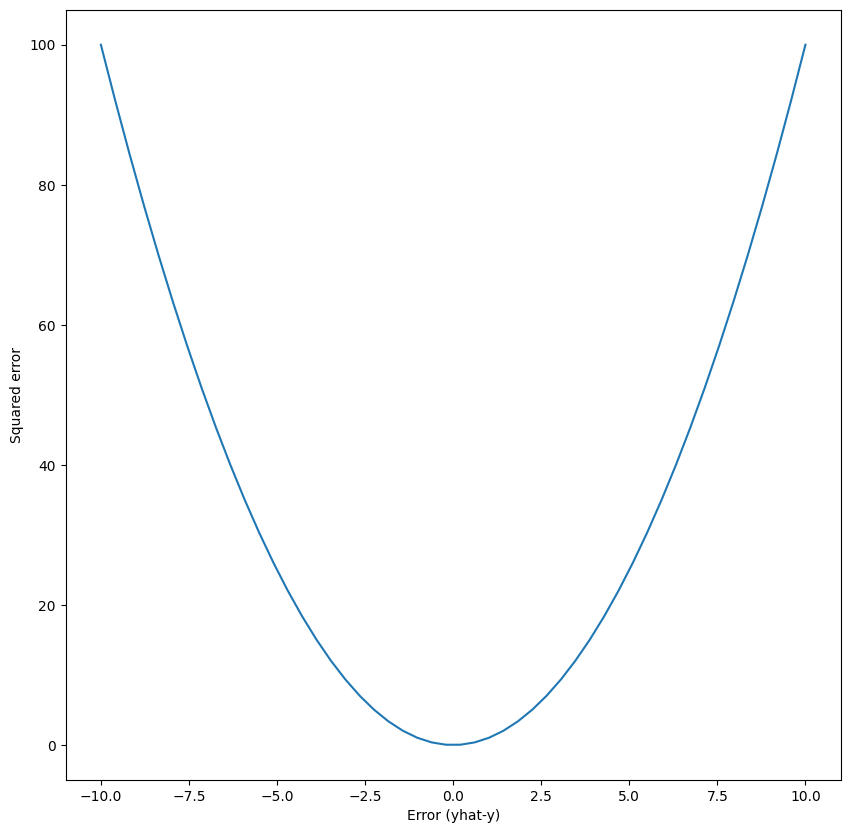

In [25]:
mse_fig, ax =plt.subplots(figsize=(10,10))
ax.plot(errors, squared_errors)
ax.set_xlabel("Error (yhat-y)")
ax.set_ylabel("Squared error")


NOTE: MSE does not work well when your regression targets are small (i.e. -1 and 1). Why? If your error \((y - \hat{y})\) between -1 and 1, squaring the error actually makes it smaller. If this is the case, you may want to consider log-transforming your targets before training.

In this lesson, we reviewed a common loss function for regression, mean squared error. We implemented the loss function ourselves, and saw multiple implementations available in torch. We also examined the relationship between the error and mean squared error.